## Improving Decision Trees

In [107]:
# import packages 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [108]:
# Data Preprocessing
titanic_df = pd.read_csv("titanic.csv") # Load the Titanic dataset

titanic_df = titanic_df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])  # Drop unnecessary columns
titanic_df['Age'] = titanic_df['Age'].fillna(titanic_df['Age'].median())    # Fill missing values in 'Age' with the median
titanic_df['Embarked'] = titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0])    # Fill missing values in 'Embarked' with the mode
titanic_df['Sex'] = titanic_df['Sex'].map({'male': 0, 'female': 1}) # Convert categorical variable 'Sex' to numerical values
titanic_df['Embarked'] = titanic_df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})   # Convert categorical variable 'Embarked' to numerical values
titanic_df = titanic_df.dropna()  # Drop any remaining rows with missing values

# Split the dataset into features and target variable
X = titanic_df.drop(columns=['Survived'])
y = titanic_df['Survived']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [109]:
# Create Random Forest model using default parameters
titanic_rf = RandomForestClassifier(n_estimators=100, random_state=7 ,bootstrap=True)

titanic_rf.fit(X_train,y_train)

print("Accuracy of base model:",titanic_rf.score(X_test, y_test))

Accuracy of base model: 0.8100558659217877


In [110]:
# Create a base estimator for our Boosted tree model using default parameters
base_estimator = DecisionTreeClassifier(max_depth=1)

# Create the AdaBoost model
boosted_model = AdaBoostClassifier(estimator=base_estimator, n_estimators=100, learning_rate=1.0, random_state=7)

# Train the model
boosted_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_boost = boosted_model.predict(X_test)
print("Boosted Tree Accuracy:", accuracy_score(y_test, y_pred_boost))

Boosted Tree Accuracy: 0.7932960893854749


Using default values when creating the boosted tree model showed a decrease in accuracy which suggests some tuning of hyperparameters is necessary

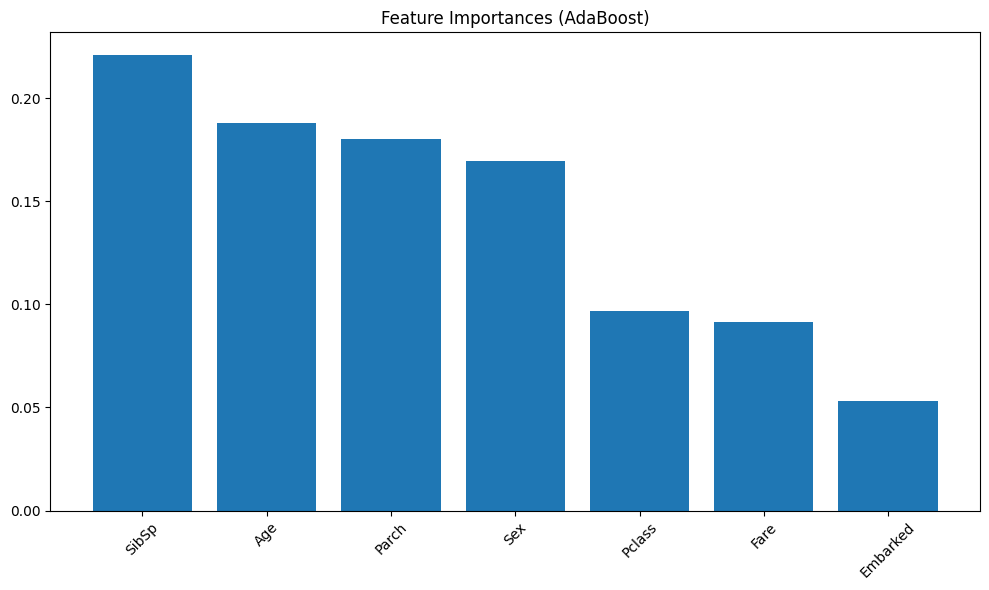

In [111]:
# Determine feature importance
importances = boosted_model.feature_importances_

# Get feature names
feature_names = X.columns

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances (AdaBoost)")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=45)
plt.tight_layout()
plt.show()

In [112]:
# Create default Random Forest model
titanic_rf = RandomForestClassifier(n_estimators=40, random_state=7 ,bootstrap=True)

titanic_rf.fit(X_train,y_train)

print("Accuracy of base model:",titanic_rf.score(X_test, y_test))

Accuracy of base model: 0.8268156424581006


In [113]:
# Can tuning hyperparameters improve the Boosted tree model?
# Use the same code as previously run but with different parameters to engineer improvements

# Create a base estimator for our Boosted tree model
base_estimator = DecisionTreeClassifier(max_depth=2)

# Create the AdaBoost model
boosted_model = AdaBoostClassifier(estimator=base_estimator, n_estimators=70, learning_rate=1.0, random_state=7)

# Train the model
boosted_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_boost = boosted_model.predict(X_test)
print("Boosted Tree Accuracy:", accuracy_score(y_test, y_pred_boost))

Boosted Tree Accuracy: 0.8212290502793296


Using different parameters in each of the Bagged, Random Forest and Boosted tree models yielded clear improvments to each from the default parameters with the following results.<br><br>
Random Forest:<br>
- n_estimators=45 - anything higher than 45 or lower than 40 decreased the accuracy score significantly<br>
- Accuracy = 0.82681564<br><br>

Boosted Tree:<br>
- max_depth=2, n_estimators=70 - anything more than 5 either side of this n_estimators figure decreased accuracy significantly<br>
- Accuracy = 0.82122905<br>
- max_depth=3, n_estimators=70 - anything more than 5 either side of this n_estimators figure decreased accuracy significantly<br>
- Accuracy = 0.81564246<br><br>

We can see from the above results that both models yielded very similar results given enough tuning of these limited hyperparameter examples but the Random Forest model just pulled ahead. Reasons for this can be attributed to the fact that the Titanic dataset is relatively small and 'noisy' so Random Forest's bagging and feature randomness provides a strong, stable model with low variance. Boosted tree models are more sensitve to noise and overfitting which given the dataset is an inherent problem.